In [2]:
# load fasta fiel

import sys
import os
import numpy as np

from pyfaidx import Fasta
sequences = Fasta("generated_final/fasta/generated.fasta")
seq_ids = list(sequences.keys())
seqs={}
for seq in sequences:
    seqs[seq[:].name] = [seq[:].seq]

# Load all fasta files from ./proteinmpnn_residues
fasta_files = os.listdir("./proteinmpnn_residues")
# only files that end with .fasta
fasta_files = [file for file in fasta_files if file.endswith(".fasta")]

for file in fasta_files:
    for id in seqs.keys():
        if file.split("_")[0] == id.split("_")[0]:
            pmpnn_sequence = Fasta(f"./proteinmpnn_residues/{file}")
            for seq in pmpnn_sequence:
                seqs[id].append(seq[:].seq)
            
average_percent = 0
percent_list = []
percent_dist = {}
for id, s_list in seqs.items():
    og = s_list[0]
    total = 0
    correct = 0
    for j in range(len(s_list[1])):
        if og[j] == s_list[1][j]:
            correct += 1
        total += 1
    percent = correct/total*100
    print(f"{id}: {percent}")
    average_percent += percent
    percent_dist[id] = percent
    percent_list.append(percent)

average_percent = np.mean(percent_list)
std_percent = np.std(percent_list)
print(f"Average: {average_percent}")
print(f"Standard deviation: {std_percent}")


# Save dict to json
with open("percent_dist.json", "w") as f:
    f.write(str(percent_dist))


0_0: 12.0
1_0: 2.0
2_0: 4.0
3_0: 8.0
4_0: 4.0
5_0: 2.0
6_0: 4.0
7_0: 8.0
8_0: 4.0
9_0: 0.0
10_0: 3.9215686274509802
11_0: 5.88235294117647
12_0: 1.9607843137254901
13_0: 1.9607843137254901
14_0: 1.9607843137254901
15_0: 5.88235294117647
16_0: 0.0
17_0: 3.9215686274509802
18_0: 1.9607843137254901
19_0: 1.9607843137254901
20_0: 5.769230769230769
21_0: 3.8461538461538463
22_0: 15.384615384615385
23_0: 1.9230769230769231
24_0: 5.769230769230769
25_0: 3.8461538461538463
26_0: 13.461538461538462
27_0: 0.0
28_0: 1.9230769230769231
29_0: 15.384615384615385
30_0: 5.660377358490567
31_0: 0.0
32_0: 0.0
33_0: 3.7735849056603774
34_0: 3.7735849056603774
35_0: 7.547169811320755
36_0: 0.0
37_0: 3.7735849056603774
38_0: 3.7735849056603774
39_0: 0.0
40_0: 11.11111111111111
41_0: 1.8518518518518516
42_0: 7.4074074074074066
43_0: 7.4074074074074066
44_0: 3.7037037037037033
45_0: 1.8518518518518516
46_0: 9.25925925925926
47_0: 1.8518518518518516
48_0: 3.7037037037037033
49_0: 1.8518518518518516
50_0: 5.45

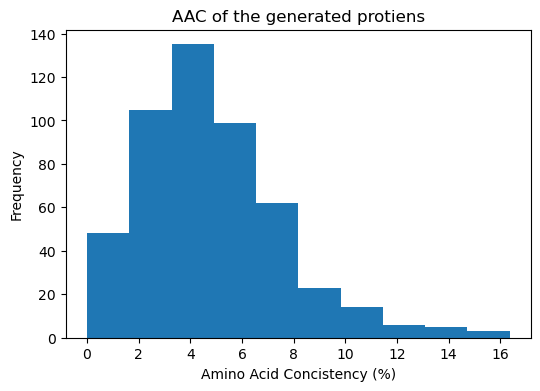

In [3]:

# Histogram of percent_list
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(percent_list, bins=10)
plt.xlabel('Amino Acid Concistency (%)')
plt.ylabel("Frequency")
plt.title('AAC of the generated protiens')
plt.savefig('./saved_plots/AAC_hist.png')
plt.show()


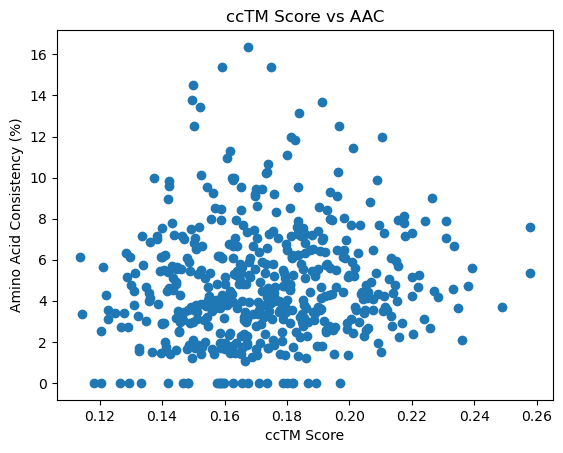

In [4]:

import json
with open('cctm_scores.json', 'r') as f:
    tm_dict = json.load(f)

tm_scores_list = list(tm_dict.values())
tm_scores_list = [float(i) for i in tm_scores_list]
tm_scores_list.sort(key = float)

# Make a scatter plot of values from tm_dict and percent_dist
# Match the values by the keys
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []
for key in tm_dict.keys():
    if key in percent_dist.keys():
        x.append(tm_dict[key])
        y.append(percent_dist[key])

plt.scatter(x, y)
plt.xlabel('ccTM Score')
plt.ylabel('Amino Acid Consistency (%)')
plt.title('ccTM Score vs AAC')
plt.savefig('./saved_plots/ccTM_vs_AAC.png')
plt.show()